In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylidc as pl
from project_config import env_config

nodule_df_path = env_config.nodule_df_file
nodule_processed_df_path = env_config.processed_nodule_df_file
hold_out_nodule_df_path = env_config.hold_out_nodule_df_file

plots_path = "report/plots"

## Distribution of annotations malignancy

6859

37.99387665840502

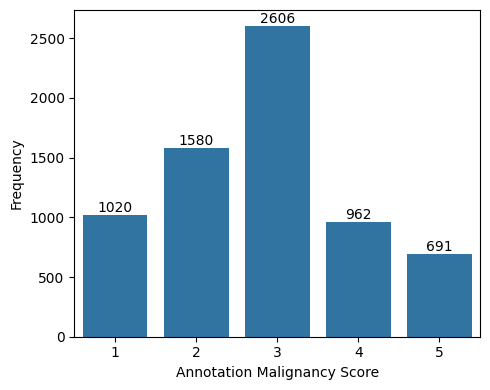

In [2]:
annotation_malignancy_counts = [
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 1).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 2).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 3).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 4).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 5).count(),
]

total = (sum(annotation_malignancy_counts))
display(total)

# calculate percentage == 3
percentage = annotation_malignancy_counts[2] / total * 100
display(percentage)

plt.figure(figsize=(5, 4))
sns.barplot(x=[1, 2, 3, 4, 5], y=annotation_malignancy_counts)
for i, count in enumerate(annotation_malignancy_counts):
    plt.text(i, count, count, ha='center', va='bottom')
plt.xlabel('Annotation Malignancy Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{plots_path}/malignancy_score_distribution.png')

## Distribution of ALL nodules consensus malignancy

In [3]:
nodule_df = pd.read_csv(nodule_df_path)
nodule_processed_df = pd.read_csv(nodule_processed_df_path)
hold_out_nodule_df = pd.read_csv(hold_out_nodule_df_path)

In [4]:
display(hold_out_nodule_df.head())
display(nodule_processed_df.head())

,nodule_id,scan_id,nodule_idx,scan_slice_thickness,scan_slice_spacing,scan_pixel_spacing,scan_contrast_used,malignancy_scores,subtlety_scores,ann_internalStructure_scores,...,bbox_10_standardised,bbox_20_standardised,bbox_30_standardised,bbox_40_standardised,bbox_50_standardised,bbox_60_standardised,bbox_70_standardised,bbox_80_standardised,bbox_90_standardised,bbox_100_standardised
0,LIDC-IDRI-0009_0,LIDC-IDRI-0009,0,1.25,1.25,0.781250,False,"(2,)","(3,)","(1,)",...,True,True,True,True,True,True,True,True,True,True
1,LIDC-IDRI-0009_1,LIDC-IDRI-0009,1,1.25,1.25,0.781250,False,"(2,)","(3,)","(1,)",...,True,True,True,True,True,True,True,True,True,True
2,LIDC-IDRI-0012_0,LIDC-IDRI-0012,0,2.50,2.50,0.742188,True,"(3, 3, 2)","(3, 4, 3)","(1, 1, 1)",...,True,True,True,True,True,True,True,True,True,True
3,LIDC-IDRI-0012_1,LIDC-IDRI-0012,1,2.50,2.50,0.742188,True,"(2, 3, 3, 2)","(4, 3, 3, 3)","(1, 1, 1, 1)",...,True,True,True,True,True,True,True,True,True,True
4,LIDC-IDRI-0012_2,LIDC-IDRI-0012,2,2.50,2.50,0.742188,True,"(3, 3, 2)","(3, 4, 3)","(1, 1, 1)",...,True,True,True,True,True,True,True,True,True,True


,nodule_id,scan_id,nodule_idx,scan_slice_thickness,scan_slice_spacing,scan_pixel_spacing,scan_contrast_used,malignancy_scores,subtlety_scores,ann_internalStructure_scores,...,bbox_10_standardised,bbox_20_standardised,bbox_30_standardised,bbox_40_standardised,bbox_50_standardised,bbox_60_standardised,bbox_70_standardised,bbox_80_standardised,bbox_90_standardised,bbox_100_standardised
0,LIDC-IDRI-0001_0,LIDC-IDRI-0001,0,2.50,2.50,0.703125,True,"(5, 5, 5, 4)","(5, 5, 5, 5)","(1, 1, 1, 1)",...,True,True,True,True,True,True,True,True,True,True
1,LIDC-IDRI-0002_0,LIDC-IDRI-0002,0,1.25,1.25,0.681641,False,"(5, 4)","(2, 1)","(1, 1)",...,True,True,True,True,True,True,True,True,True,True
2,LIDC-IDRI-0003_0,LIDC-IDRI-0003,0,2.50,2.50,0.820312,True,"(2,)","(1,)","(1,)",...,True,True,True,True,True,True,True,True,True,True
3,LIDC-IDRI-0003_1,LIDC-IDRI-0003,1,2.50,2.50,0.820312,True,"(5, 5, 3, 4)","(5, 5, 5, 5)","(1, 1, 1, 1)",...,True,True,True,True,True,True,True,True,True,True
4,LIDC-IDRI-0003_2,LIDC-IDRI-0003,2,2.50,2.50,0.820312,True,"(4, 4, 3, 2)","(4, 4, 3, 3)","(1, 1, 1, 1)",...,True,True,True,True,True,True,True,True,True,True


In [5]:
nodule_df.shape

(2625, 52)

In [6]:
# total should be 2141
full_df = pd.concat([nodule_df, hold_out_nodule_df])
display(full_df.shape)

# full_df["pid"]

(2896, 52)

# Annotation Correlation Plot
We reorder the values of the features that do not reflect a natural scale. These are:
- calcification

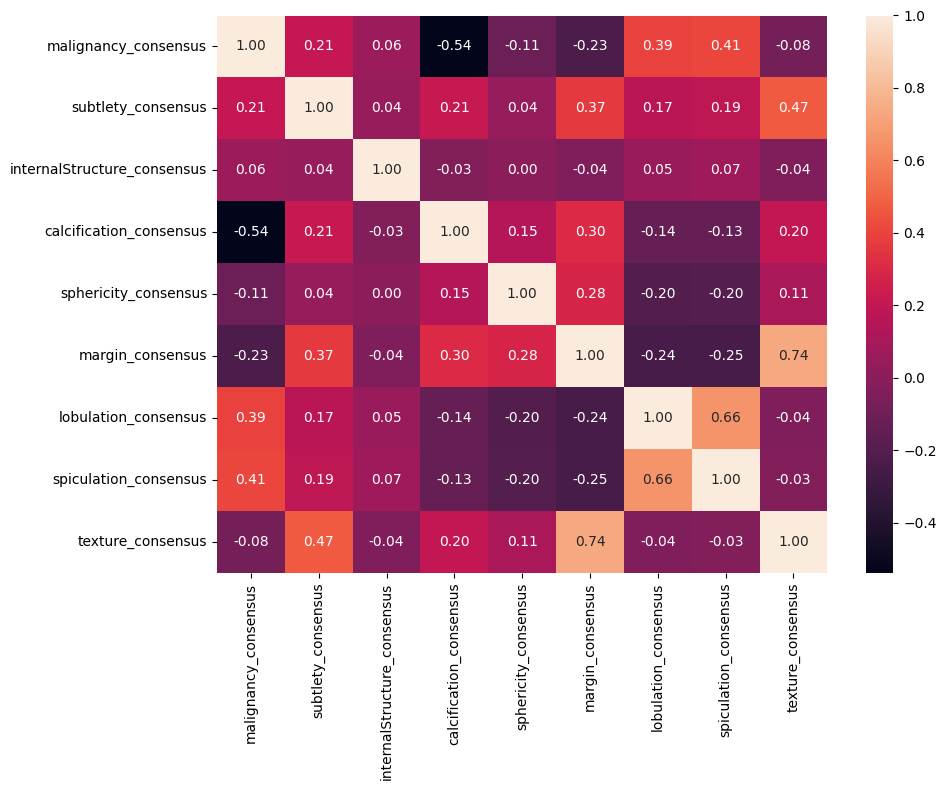

In [ ]:
nodule_df = pd.read_csv(nodule_df_path)[["malignancy_consensus", "subtlety_consensus", "internalStructure_consensus", "calcification_consensus", "sphericity_consensus", "margin_consensus", "lobulation_consensus", "spiculation_consensus", "texture_consensus"]]

# excluded:
# internalStructure_consensus


"""
new order of calcification:
1. abscent
2. non-central
3. central
4. solid
5. laminated
6. popcorn
"""
calcification_mapping = {6:1, 1:6, 2:5, 3:4, 4:2, 5:3}

nodule_df["calcification_consensus"] = nodule_df["calcification_consensus"].map(calcification_mapping)

# plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nodule_df.corr(method="pearson"), annot=True, fmt=".2f")
plt.tight_layout()

## Model Performance Trend for different context windows plot

In [29]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def get_results_df(experiment_ids: list[str]) -> pd.DataFrame:
    local_user = "newuser"
    results = {}
    for e in experiment_ids:
        local_exp_path = f"/Users/{local_user}/Documents/ITU/master_thesis/hpc/jobs/{e}"
        with open(f"{local_exp_path}/run_{e}.json") as f:
            config = json.load(f)
        results[e] = config

    # get aggregated results from all folds
    dataframes = []
    for exp in experiment_ids:
        info = exp.split("_")
        context = info[0]
        dimensionality = info[1]
        all_fold_results = {
            "auc_filtered": [],
            "auc_ovr": [],
            "mae": [],
            "mse": [],
            "cwce": [],
            "binary_accuracy": [],
        }
        for fold in results[exp]["fold_results"]:
            # TODO use the metrics for the best loss
            best_loss_epoch = fold["best_loss_epoch"] - 1 # saved as 1-indexed
            # best_loss_epoch = -1 # use the last epoch

            val_auc_filtered = fold["val_AUC_filtered"][best_loss_epoch]
            val_auc_ovr = fold["val_AUC_ovr"][best_loss_epoch]
            val_mae = fold["val_maes"][best_loss_epoch]
            val_mse = fold["val_mses"][best_loss_epoch]
            val_cwce = fold["val_cwces"][best_loss_epoch]
            val_accuracy = fold["val_binary_accuracies"][best_loss_epoch]

            all_fold_results["auc_filtered"].append(val_auc_filtered)
            all_fold_results["auc_ovr"].append(val_auc_ovr)
            all_fold_results["mae"].append(val_mae)
            all_fold_results["mse"].append(val_mse)
            all_fold_results["cwce"].append(val_cwce)
            all_fold_results["binary_accuracy"].append(val_accuracy)

        agg_results = {}
        for k, v in all_fold_results.items():
            agg_results[k] = context, dimensionality, np.mean(v), np.std(v)

        results_df = pd.DataFrame.from_dict(agg_results, orient="index", columns=["context", "dim", "mean", "std"])
        dataframes.append(results_df)

    results_df = pd.concat(dataframes).reset_index().rename(columns={"index": "metric"})
    return results_df

experiments_25D = [
    "c20_25D_2411_1631",
    "c30_25D_2411_1543",
    "c40_25D_2411_1640",
    "c50_25D_2411_1812",
    "c60_25D_2411_1641",
    "c70_25D_2411_1705",
]
experiments_3D = [
    "c20_3D_2511_0013",
    "c30_3D_2411_1947",
    "c40_3D_2511_1536",
    "c50_3D_2411_1831",
    # "c60_3D_2511_2027",
    "c70_3D_2411_1824",
]

agg_results_25D = get_results_df(experiments_25D)
agg_results_3D = get_results_df(experiments_3D)
print("25D")
display(agg_results_25D)
print("3D")
display(agg_results_3D)

25D


,metric,context,dim,mean,std
0,auc_filtered,c20,25D,0.914806,0.017861
1,auc_ovr,c20,25D,0.715784,0.020353
2,mae,c20,25D,0.524977,0.027898
3,mse,c20,25D,0.651111,0.042262
4,cwce,c20,25D,0.345971,0.046392
5,binary_accuracy,c20,25D,0.799619,0.014946
6,auc_filtered,c30,25D,0.911464,0.012075
7,auc_ovr,c30,25D,0.725371,0.015695
8,mae,c30,25D,0.500812,0.034704
9,mse,c30,25D,0.616258,0.058046


3D


,metric,context,dim,mean,std
0,auc_filtered,c20,3D,0.916607,0.027119
1,auc_ovr,c20,3D,0.731427,0.022429
2,mae,c20,3D,0.493141,0.020077
3,mse,c20,3D,0.593317,0.044254
4,cwce,c20,3D,0.341266,0.015584
5,binary_accuracy,c20,3D,0.804069,0.024199
6,auc_filtered,c30,3D,0.903002,0.025152
7,auc_ovr,c30,3D,0.729291,0.018351
8,mae,c30,3D,0.475882,0.030650
9,mse,c30,3D,0.587947,0.069957


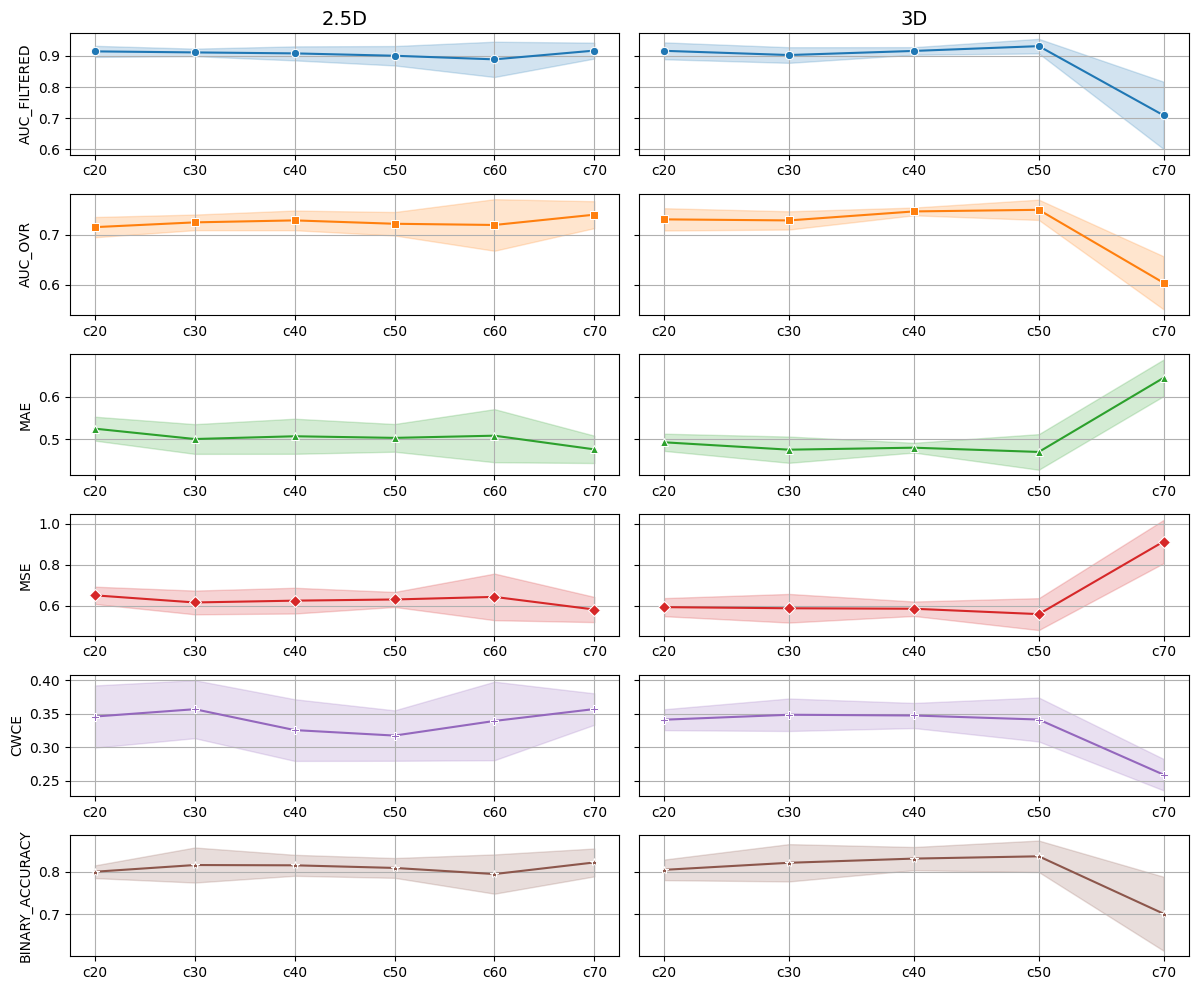

In [33]:
n_metrics = agg_results_25D["metric"].nunique()
fig, axes = plt.subplots(nrows=n_metrics, ncols=2, figsize=(12, 10), sharey="row")

markers = ['o', 's', '^', 'D', 'P', '*']
colors = sns.color_palette("tab10")

for i, metric in enumerate(agg_results_25D["metric"].unique()):
    metric_25D = agg_results_25D[agg_results_25D["metric"] == metric]
    metric_3D = agg_results_3D[agg_results_3D["metric"] == metric]

    # 25D
    ax = axes[i, 0]
    if i == 0:
        ax.set_title("2.5D", fontsize=14)
    sns.lineplot(x="context", y="mean", data=metric_25D, ax=ax, marker=markers[i], color=colors[i])
    ax.fill_between(
        x=metric_25D["context"],
        y1=metric_25D["mean"] - metric_25D["std"],
        y2=metric_25D["mean"] + metric_25D["std"],
        color=colors[i],
        alpha=0.2,
    )
    ax.set_ylabel(metric.upper())
    ax.set_xlabel("")
    ax.grid(True)

    # 3D
    ax = axes[i, 1]
    if i == 0:
        ax.set_title("3D", fontsize=14)
    sns.lineplot(x="context", y="mean", data=metric_3D, ax=ax, marker=markers[i], color=colors[i])
    ax.fill_between(
        metric_3D["context"],
        metric_3D["mean"] - metric_3D["std"],
        metric_3D["mean"] + metric_3D["std"],
        color=colors[i],
        alpha=0.2,
    )
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.grid(True)

# plt.suptitle("Performance Trend", fontsize=16)
plt.tight_layout()
plt.show()

**NOTE**: the errorbar in the plot above is 1 whole std both above and below the line.

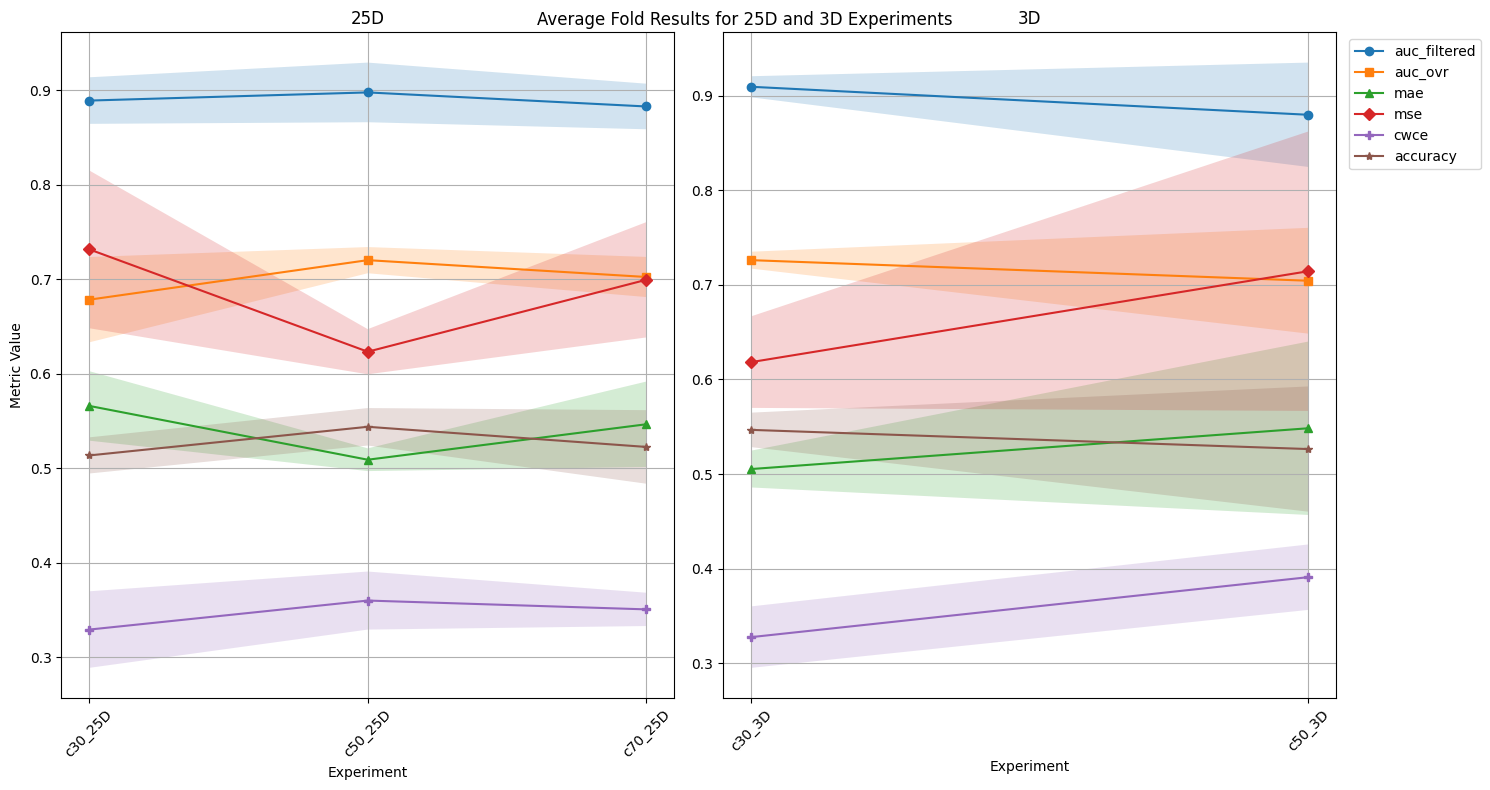

In [216]:
# Define unique markers for each line
def plot_agg_results(agg_results_df: pd.DataFrame, ax) -> plt.Figure:
    markers = ['o', 's', '^', 'D', 'P', '*']

    for metric, marker in zip(agg_results_df["metric"].unique(), markers):
    # Plot the results with different markers
        metric_data = agg_results_df.query(f"metric == '{metric}'")
        ax.plot(
            range(len(metric_data)),
            metric_data["mean"],
            label=metric,
            marker=marker,
        )
        ax.fill_between(
            range(len(metric_data)),
            metric_data["mean"] - metric_data["std"],
            metric_data["mean"] + metric_data["std"],
            alpha=0.2
        )

    # Change the x-axis labels to the context and dimensionality
    x_labels = [f"{row['context']}_{row['dim']}" for i, row in agg_results_df.query("metric == 'mae'").iterrows()]
    ax.set_xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)
    ax.set_xlabel("Experiment")
    ax.grid(True)

    # Move the legend outside the plot
    dims = agg_results_df["dim"].unique()[0]
    ax.set_title(dims)
    return fig


fig, ax = plt.subplots(1, 2, figsize=(15, 8))
plot_agg_results(agg_results_25D, ax[0])
plot_agg_results(agg_results_3D, ax[1])
ax[0].set_ylabel("Metric Value")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.suptitle("Average Fold Results for 25D and 3D Experiments")
plt.savefig(f"report/plots/average_fold_results.png")
plt.show()
